<a href="https://colab.research.google.com/github/ajeetkartikay/ajeetkartikay/blob/main/traffic_01_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install opencv-python
!pip install tensorflow
!pip install matplotlib


In [1]:
from google.colab import files
uploaded = files.upload()  # Use this to upload ZIP


Saving GTSRB_Final_Training_Images.zip to GTSRB_Final_Training_Images.zip


#unzip

In [2]:
import zipfile
import os

with zipfile.ZipFile('GTSRB_Final_Training_Images.zip', 'r') as zip_ref:
    zip_ref.extractall('GTSRB')


# process hte dataset


In [5]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import os

img_size = (32, 32)
data_dir = '/content/GTSRB/GTSRB/Final_Training/Images'

X, y = [], []

for label in range(43):
    folder_path = os.path.join(data_dir, format(label, '05d'))
    for img_file in os.listdir(folder_path):
        if img_file.endswith('.ppm'):
            img = cv2.imread(os.path.join(folder_path, img_file))
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(label)

X = np.array(X) / 255.0
y = np.array(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape)
print("Validation samples:", X_val.shape)


Training samples: (31367, 32, 32, 3)
Validation samples: (7842, 32, 32, 3)


#Build and Train the CNN

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# One-hot encode labels
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 47s 90ms/step - accuracy: 0.2650 - loss: 2.7769 - val_accuracy: 0.8217 - val_loss: 0.7351
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - accuracy: 0.7131 - loss: 0.9147 - val_accuracy: 0.9231 - val_loss: 0.2985
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.8204 - loss: 0.5577 - val_accuracy: 0.9615 - val_loss: 0.1725
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.8739 - loss: 0.3999 - val_accuracy: 0.9702 - val_loss: 0.1483
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - accuracy: 0.8974 - loss: 0.3229 - val_accuracy: 0.9768 - val_loss: 0.0953
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 86s 92ms/step - accuracy: 0.9135 - loss: 0.2693 - val_accuracy: 0.9815 - val_loss: 0.0836
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 43s 88ms/step - accuracy: 0.9267 - loss: 0.2285 - val_accuracy: 0.9855 - val_loss: 0.0671
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.9364 - loss: 0.2027 - 

#Plot Accuracy and Loss

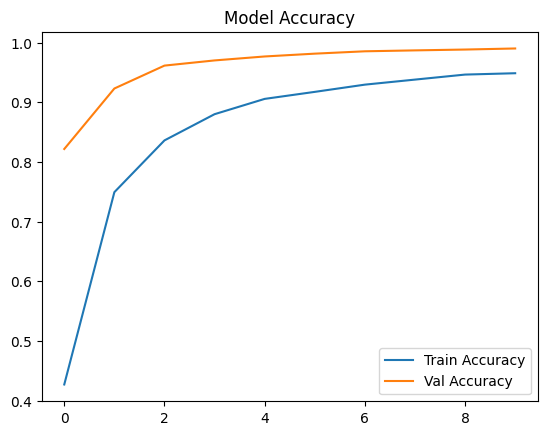

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.legend()
plt.show()


# save the model

In [9]:
model.save('my_model.keras')


# download

In [10]:
from google.colab import files
files.download("traffic_sign_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
uploaded = files.upload()


Saving GTSRB_Final_Training_Images.zip to GTSRB_Final_Training_Images (1).zip


In [17]:
classes = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right of way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}


In [18]:
def predict_image_readable(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (32, 32))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    label = classes[class_index]

    print(f"Predicted Class: {class_index} => {label}")


In [21]:
from google.colab import files
import os
import cv2
import numpy as np

# Optional: download model file
# from google.colab import files
# files.download("traffic_sign_model.h5")

# Mapping of class index to traffic sign label
classes = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right of way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}

# === STEP 1: Upload Image ===
print("Please upload the image file you want to predict:")
uploaded = files.upload()

# === STEP 2: Prediction Function ===
def predict_image(img_path):
    if not os.path.exists(img_path):
        print(f"❌ Error: Image file not found at {img_path}")
        return

    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Error: Could not read image from {img_path}")
        return

    img = cv2.resize(img, (32, 32))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_index = int(np.argmax(prediction))
    class_label = classes.get(class_index, "Unknown class")

    print(f"✅ Predicted Class Index: {class_index}")
    print(f"🛑 Predicted Traffic Sign: {class_label}")

# === STEP 3: Run Prediction ===
if uploaded:
    uploaded_img_name = list(uploaded.keys())[0]
    print(f"📂 Uploaded file: {uploaded_img_name}")
    predict_image(uploaded_img_name)
else:
    print("⚠️ No file was uploaded.")


Please upload the image file you want to predict:


Saving 00446.ppm to 00446.ppm
📂 Uploaded file: 00446.ppm
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
✅ Predicted Class Index: 31
🛑 Predicted Traffic Sign: Wild animals crossing
